In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
# Create some example data with noise
np.random.seed(42)  # for reproducibility
X = np.linspace(1, 10, 20) + np.random.normal(0, 1, size=20) # 20 evenly spaced points between 1 and 10
Y = 2 * X + np.random.normal(0, 1, size=len(X))  # Y = 2X plus some noise

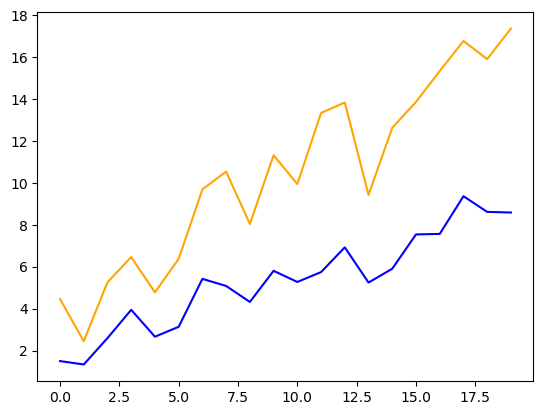

In [3]:
plt.plot(X, color='blue')
plt.plot(Y, color='orange')

In [4]:
# Создаем и тренируем модель линейной регрессии
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y)

# Получаем значения коэффициентов
a = model.coef_[0]
b = model.intercept_

# Выводим значения коэффициентов
print("Коэффициент a:", a)
print("Коэффициент b:", b)

Коэффициент a: 1.8655721390132278
Коэффициент b: 0.4503508208284597


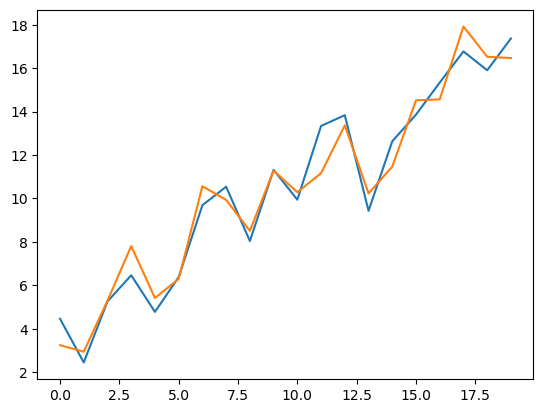

In [5]:
plt.plot(Y)
plt.plot(a*X+b)

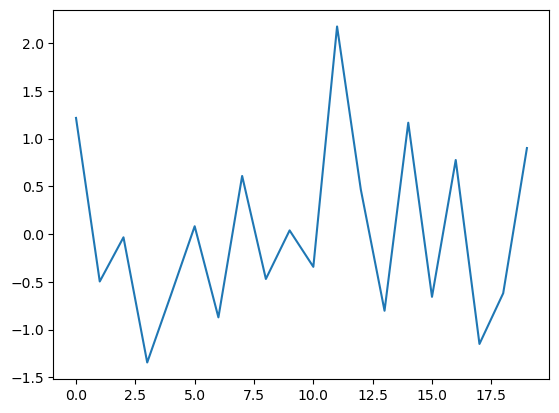

In [6]:
# Вычисляем ряд Y - a*X - b
result = Y - a*X - b

plt.plot(result)

# Пример 2

In [7]:
import numpy as np

# Create X values
X_1 = np.linspace(1, 50, 50) + np.random.normal(0, 3, size=50)
X_2 = np.linspace(25, 40, 30) + np.random.normal(0, 3, size=30)
X_3 = np.linspace(55, 40, 20) + np.random.normal(0, 3, size=20)
X = np.concatenate([X_1, X_2, X_3])

# Create Y values
Y_1 = 2 * X_1 + np.random.normal(0, 9, len(X_1))  # with some noise
Y_2 = 3 * X_2 + np.random.normal(0, 9, len(X_2))  # with some noise
Y_3 = 1 * X_3 + np.random.normal(0, 9, len(X_3))  # with some noise

Y = np.concatenate([Y_1, Y_2, Y_3])

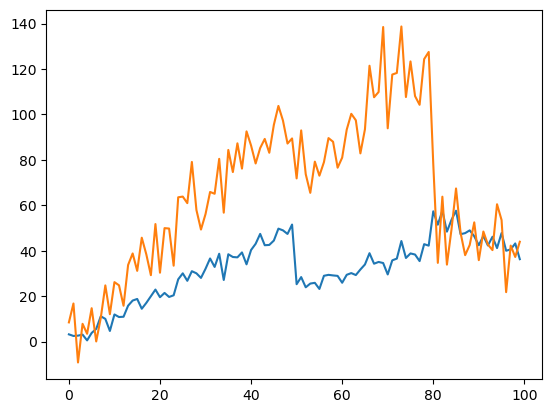

In [8]:
plt.plot(X)
plt.plot(Y)

In [9]:
# Создаем и тренируем модель линейной регрессии
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y)

# Получаем значения коэффициентов
a = model.coef_[0]
b = model.intercept_

# Выводим значения коэффициентов
print("Коэффициент a:", a)
print("Коэффициент b:", b)

Коэффициент a: 1.2862107635411035
Коэффициент b: 24.083171781060628


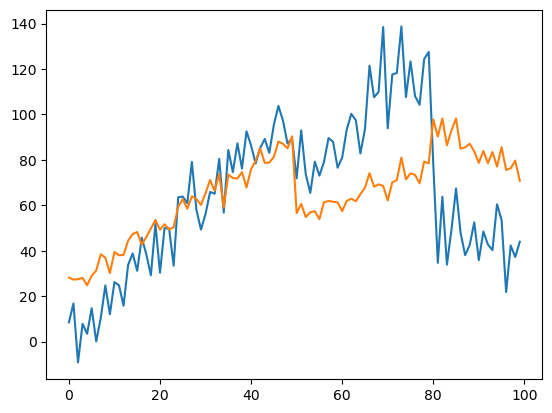

In [10]:
plt.plot(Y)
plt.plot(a*X+b)

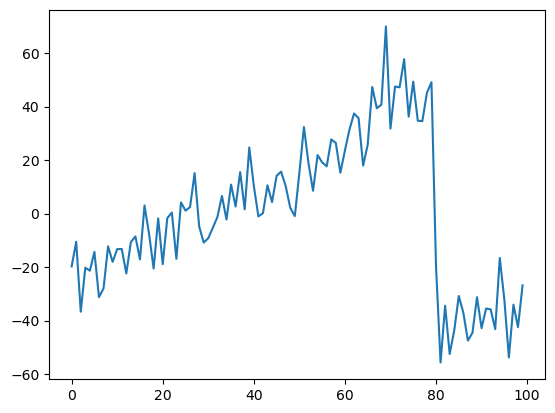

In [11]:
plt.plot(Y- a*X-b)

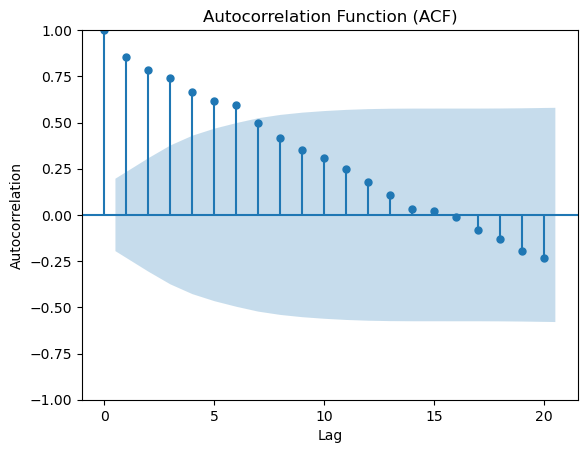

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Создание DataFrame из временного ряда
df = pd.DataFrame(Y- a*X-b, columns=['Value'])

# Построение графика ACF
plot_acf(df['Value'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [13]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(Y- a*X-b, maxlag = 2)
adf[0]

-1.6055224250322016

In [14]:
adf[4]

{'1%': -3.4996365338407074,
 '5%': -2.8918307730370025,
 '10%': -2.5829283377617176}

# Обучение по кусочкам (с меньшим периодом)

In [15]:
import numpy as np

# Create X values
X_1 = np.linspace(1, 50, 50) + np.random.normal(0, 3, size=50)
X_2 = np.linspace(25, 40, 30) + np.random.normal(0, 3, size=30)
X_3 = np.linspace(55, 40, 20) + np.random.normal(0, 3, size=20)
X = np.concatenate([X_1, X_2, X_3])

# Create Y values
Y_1 = 2 * X_1 + np.random.normal(0, 9, len(X_1))  # with some noise
Y_2 = 3 * X_2 + np.random.normal(0, 9, len(X_2))  # with some noise
Y_3 = 1 * X_3 + np.random.normal(0, 9, len(X_3))  # with some noise

Y = np.concatenate([Y_1, Y_2, Y_3])

In [16]:
# plt.plot(X)
# plt.plot(Y)

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()
N = 20
# Iterate over data
regression_results_a = []
regression_results_b = []

for i in range(N, len(X)+1, N):
    X_reshape = X[i-N:i].reshape(-1, 1)  # Reshape X for sklearn
    model.fit(X_reshape, Y[i-N:i])  # Fit the model with current data
    regression_results_a.append(model.coef_[0])  # Save the current estimated coefficient
    regression_results_b.append(model.intercept_)
    

# Create DataFrame and print
df_regression = pd.DataFrame(regression_results_a, columns=['alpha'])
df_regression['beta'] = regression_results_b
# print(df_regression)

In [18]:
# df_regression

In [19]:
# Extract coefficients from DataFrame
betas = df_regression['beta'].values
alphas = df_regression['alpha'].values

In [20]:
Y_ = X[:len(alphas) * N] * alphas.repeat(N) + betas.repeat(N)

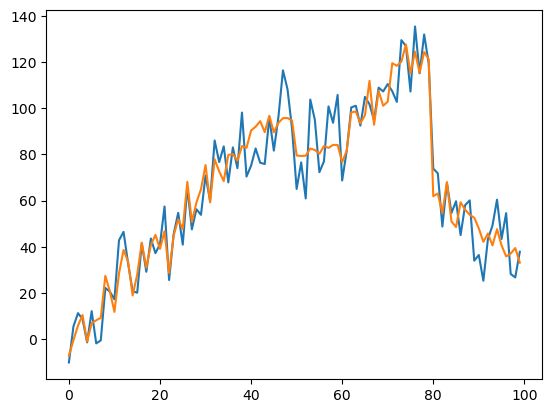

In [21]:
plt.plot(Y)
plt.plot(Y_)

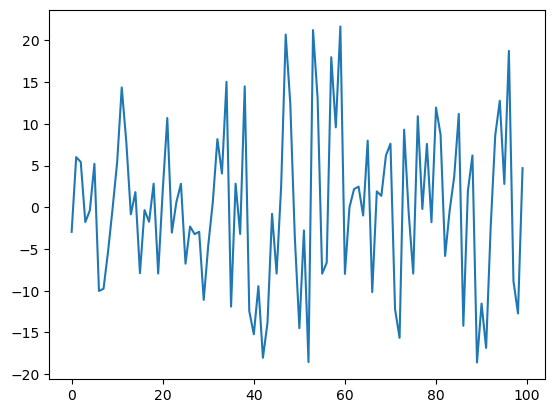

In [22]:
plt.plot(Y-Y_)

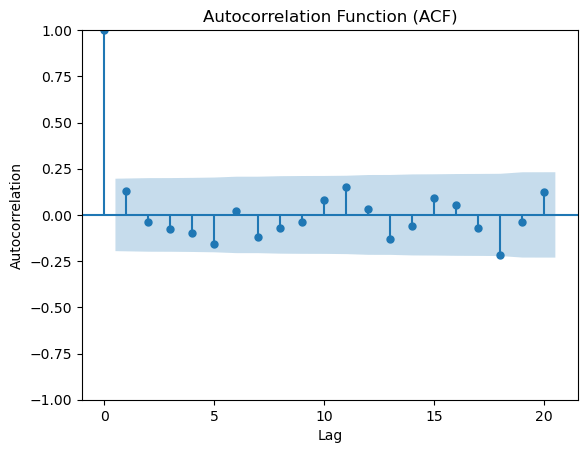

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Создание DataFrame из временного ряда
df = pd.DataFrame(Y-Y_, columns=['Value'])

# Построение графика ACF
plot_acf(df['Value'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [24]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(Y-Y_, maxlag = 2)
adf[0]

-8.656216857351602

In [25]:
adf[4]

{'1%': -3.498198082189098,
 '5%': -2.891208211860468,
 '10%': -2.5825959973472097}

# Проверка на паре NEO/MANA с начала 2022 года

In [26]:
df_mana = pd.read_csv("C:/Users/ahrus/Desktop/cb/cryptobot/data/ohlc/MANAUSDT-1m-combined_data.csv", sep=',')
df_neo = pd.read_csv("C:/Users/ahrus/Desktop/cb/cryptobot/data/ohlc/NEOUSDT-1m-combined_data.csv", sep=',')

In [27]:
df_neo

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1640908800000,26.13,26.13,26.10,26.10,156.86,1640908859999,4097.2013,13,38.28,999.8571,0
1,1640908860000,26.11,26.17,26.11,26.17,469.03,1640908919999,12257.9141,40,345.48,9029.6456,0
2,1640908920000,26.17,26.25,26.17,26.25,360.14,1640908979999,9440.3622,44,239.64,6281.4566,0
3,1640908980000,26.22,26.24,26.18,26.18,305.48,1640909039999,8009.1010,32,38.99,1022.7845,0
4,1640909040000,26.19,26.21,26.18,26.19,315.47,1640909099999,8261.9998,20,160.08,4192.6754,0
...,...,...,...,...,...,...,...,...,...,...,...,...
787595,1688169300000,9.56,9.58,9.56,9.58,294.61,1688169359999,2821.0335,35,169.73,1625.9059,0
787596,1688169360000,9.58,9.58,9.58,9.58,12.93,1688169419999,123.8694,4,12.93,123.8694,0
787597,1688169420000,9.57,9.57,9.57,9.57,220.72,1688169479999,2112.2904,25,158.53,1517.1321,0
787598,1688169480000,9.57,9.57,9.57,9.57,17.88,1688169539999,171.1116,4,5.45,52.1565,0


In [28]:
df_mana = df_mana[['close','close_time']]
df_neo = df_neo[['close','close_time']]

In [29]:
df_mana['close_time'] = pd.to_datetime(df_mana['close_time'], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')
df_neo['close_time'] = pd.to_datetime(df_neo['close_time'], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')

C:\Users\ahrus\AppData\Local\Temp\ipykernel_40796\4182102195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neo['close_time'] = pd.to_datetime(df_neo['close_time'], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')


In [30]:
df_mana = df_mana.iloc[::5, :]
df_neo = df_neo.iloc[::5, :]
#группировка по 5 минут

In [31]:
df_mana.head()

,close,close_time
0,3.2826,2021-12-31 00:00:59
5,3.2954,2021-12-31 00:05:59
10,3.3041,2021-12-31 00:10:59
15,3.3061,2021-12-31 00:15:59
20,3.2956,2021-12-31 00:20:59


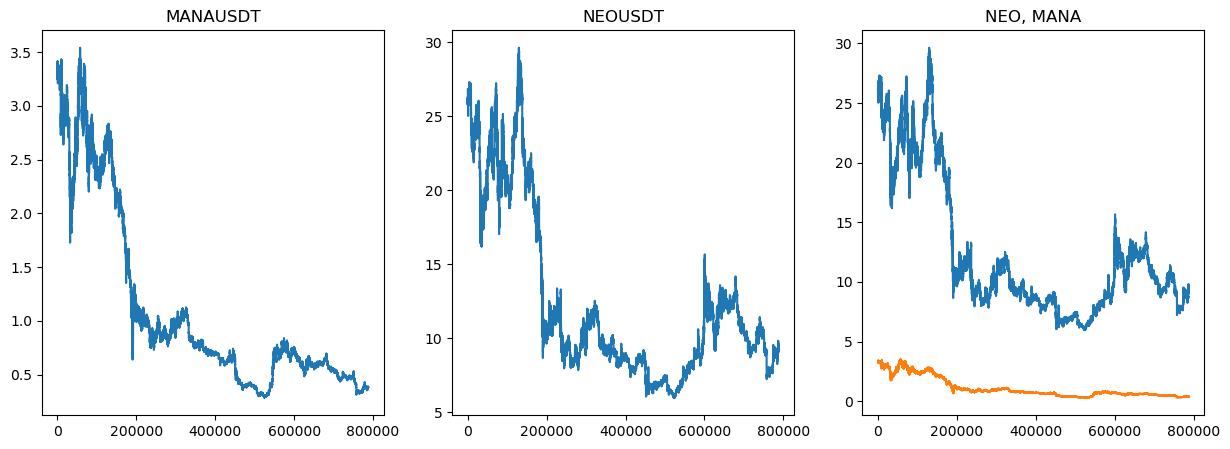

In [32]:
import matplotlib.pyplot as plt

# Создаем область для двух графиков с одной строкой и двумя колонками
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_mana['close'])
ax[0].set_title('MANAUSDT')
ax[1].plot(df_neo['close'])
ax[1].set_title('NEOUSDT')
ax[2].plot(df_neo['close'])
ax[2].plot(df_mana['close'])
ax[2].set_title('NEO, MANA')




# Отображаем графики
plt.show()


In [33]:
# df_mana = df_mana[17600:]
# df_neo = df_neo[17600:]

In [34]:
X = df_mana.close.values
Y = df_neo.close.values

# Создаем и тренируем модель линейной регрессии
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y)

# Получаем значения коэффициентов
a = model.coef_[0]
b = model.intercept_

# Выводим значения коэффициентов
print("Коэффициент a:", a)
print("Коэффициент b:", b)

Коэффициент a: 6.517974564948616
Коэффициент b: 5.229934390512554


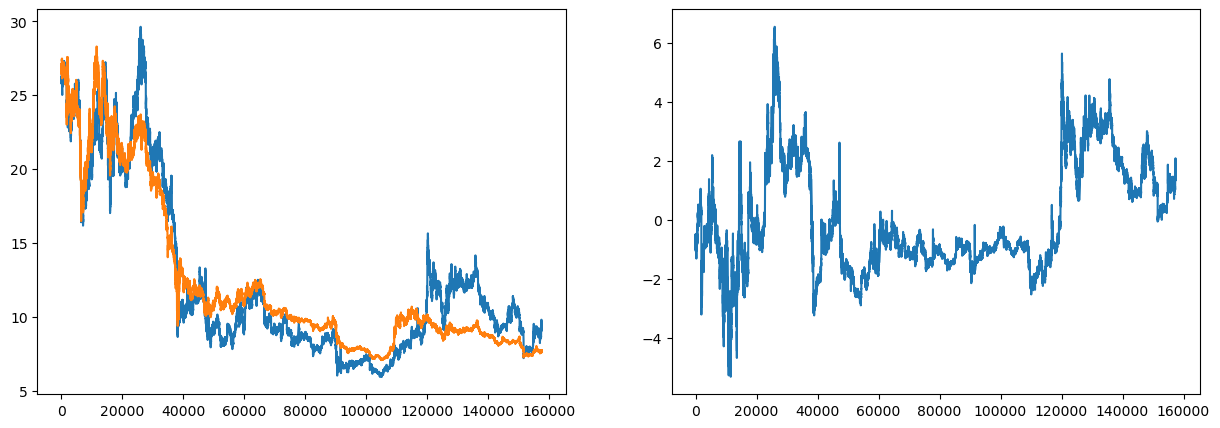

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


ax[0].plot(Y)
ax[0].plot(a*X+b)
ax[1].plot(Y-a*X-b)

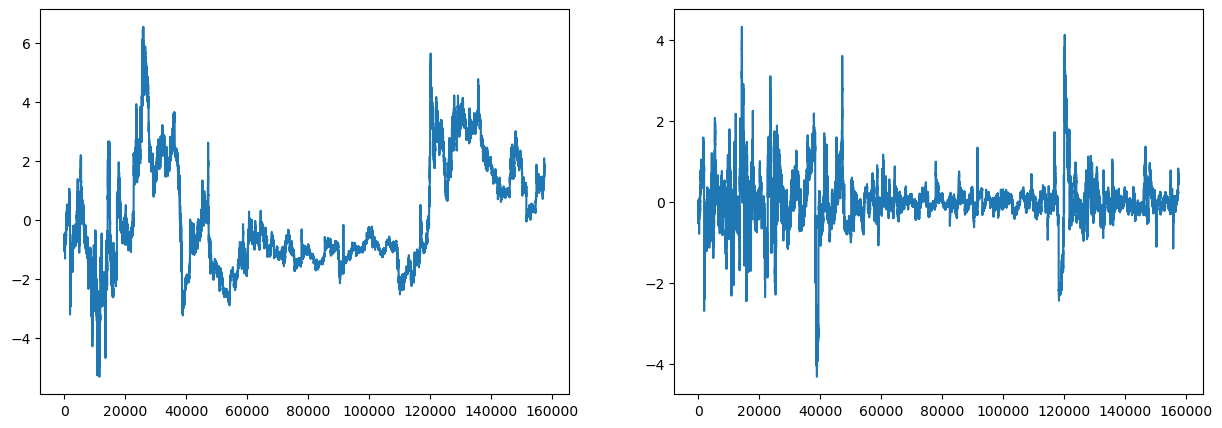

In [36]:
from sklearn.linear_model import LinearRegression
#3580
# Initialize model
model = LinearRegression()
N = 3580 
# Iterate over data
regression_results_a = []
regression_results_b = []

for i in range(N, len(X)+1, N):
    X_reshape = X[i-N:i].reshape(-1, 1)  # Reshape X for sklearn
    model.fit(X_reshape, Y[i-N:i])  # Fit the model with current data
    regression_results_a.append(model.coef_[0])  # Save the current estimated coefficient
    regression_results_b.append(model.intercept_)
    

# Create DataFrame and print
df_regression = pd.DataFrame(regression_results_a, columns=['alpha'])
df_regression['beta'] = regression_results_b
# print(df_regression)

# Extract coefficients from DataFrame
betas = df_regression['beta'].values
alphas = df_regression['alpha'].values

Y_ = X[:len(alphas) * N] * alphas.repeat(N) + betas.repeat(N)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(Y-a*X-b)
ax[1].plot(Y-Y_)

In [41]:
# Compute ADF test statistics
adf = adfuller(Y-a*X-b, maxlag = 2)
adf[0]

-3.420633397944063

In [42]:
# Compute ADF test statistics
adf = adfuller(Y-Y_, maxlag = 2)
adf[0]

-12.725594144941464

1) для первичного  теста данные брались за всю имеющуюся историю (а несколько лет назад крипта имела сильные расхождения, поэтому отклонения портили коинтеграцию)
2) регрессия обучалась на всех данных (даже не на 30 днях или 90 днях, а на всех данных), а при торговле переобучаемся каждые 2!!! дня